In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
===
# Input data files are available in the read-================]]=only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd

# Load the CSV file
data_path = os.path.join("C:/Users/Lenovo/Downloads/Automobile_ww.csv")
df = pd.read_csv(data_path)

# Show the first few rows of the dataframe
df.head()


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [5]:
# Check for missing values in the dataset
df.isnull().sum()


name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [7]:
# Check for missing values in the dataset
df.isnull().sum()


name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

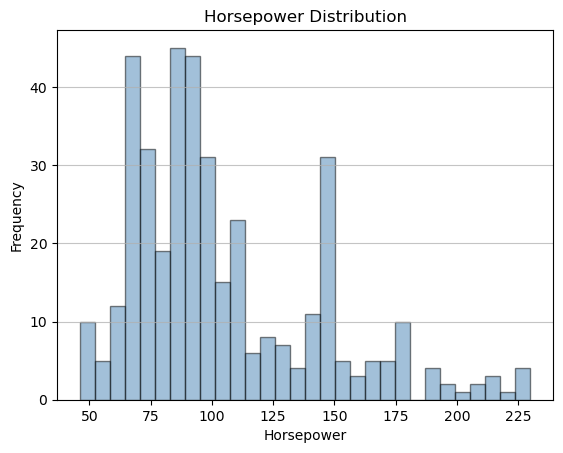

In [11]:
import matplotlib.pyplot as plt

# Plot histogram of 'horsepower' column to examine its distribution
plt.hist(df['horsepower'].dropna(), bins=30, alpha=0.5, color='steelblue', edgecolor='black')
plt.title('Horsepower Distribution')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [13]:
# Calculate the median of the 'horsepower' column
horsepower_median = df['horsepower'].median()

# Impute missing values with the median
df['horsepower'].fillna(horsepower_median, inplace=True)

# Check for missing values in the dataset again
df.isnull().sum()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5712\343051989.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(horsepower_median, inplace=True)


name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [13]:
# Generate statistical summary of the numerical columns in the dataset
df.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000



--- Univariate Analysis ---


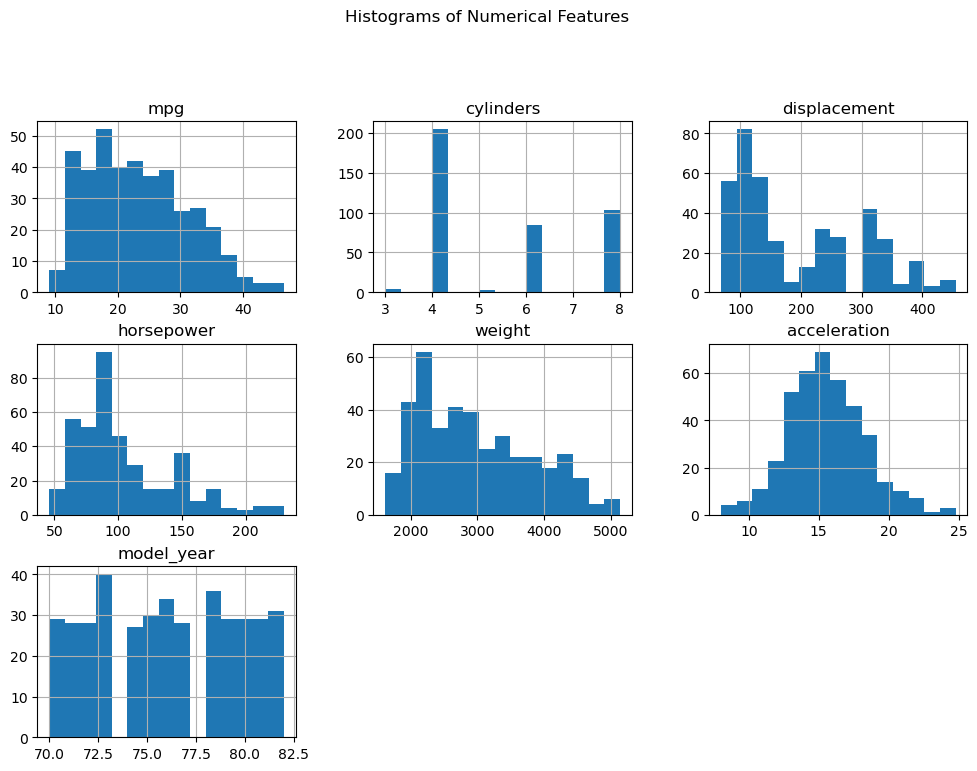

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Univariate Analysis ---
print("\n--- Univariate Analysis ---")
numerical_features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
categorical_feature = 'origin' # Before one-hot encoding

# Histograms for numerical features
df[numerical_features].hist(bins=15, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()



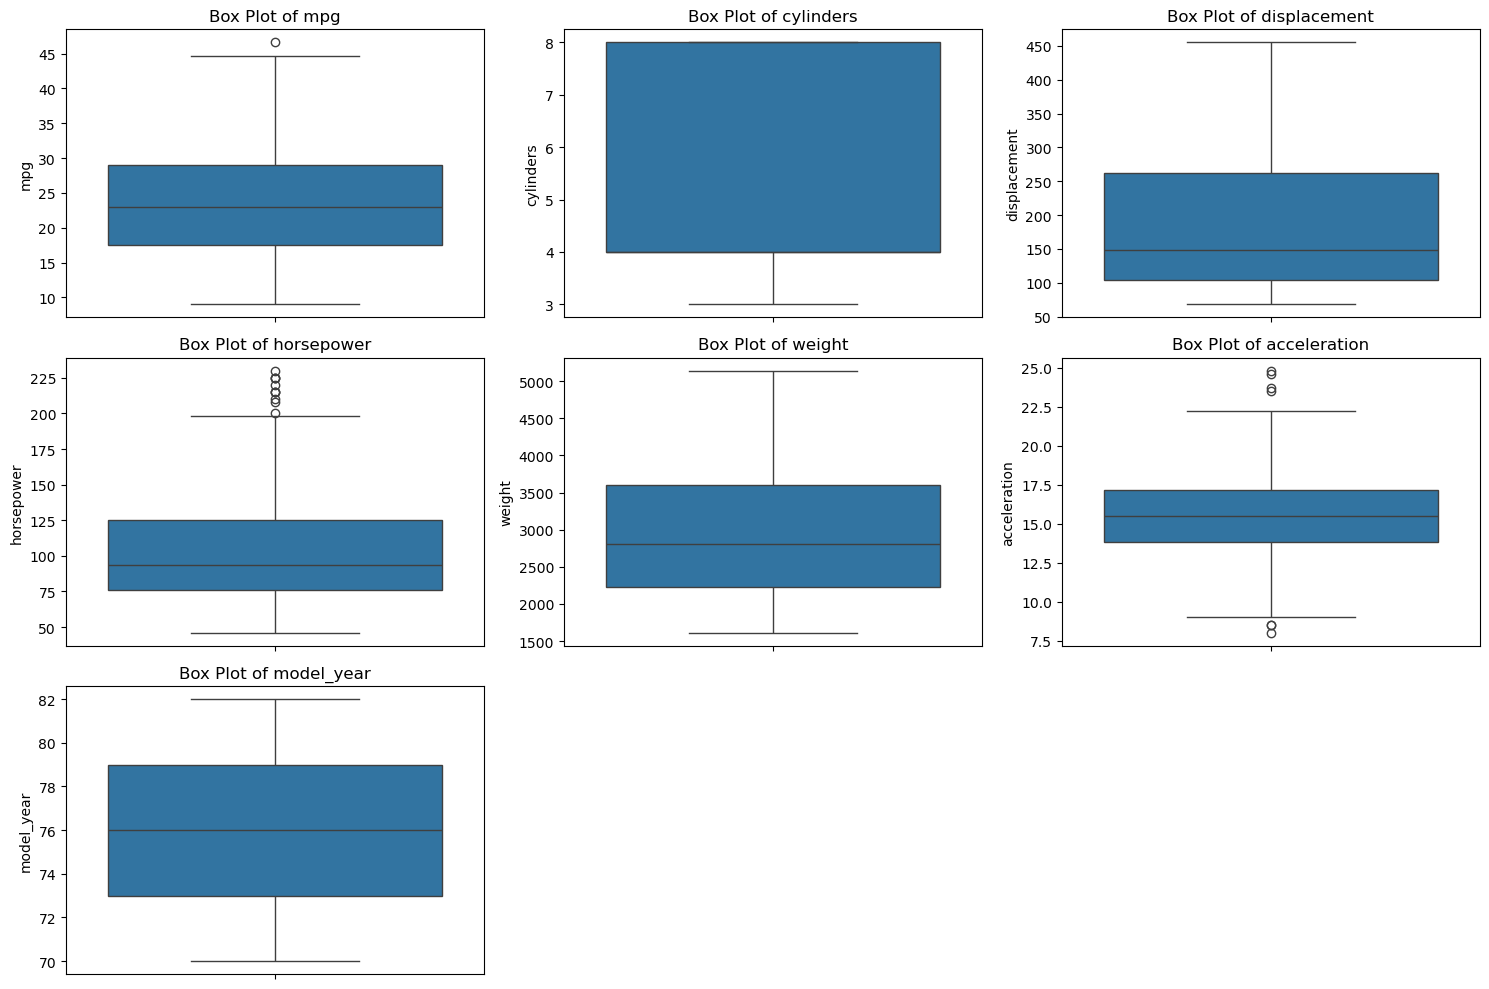

In [29]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


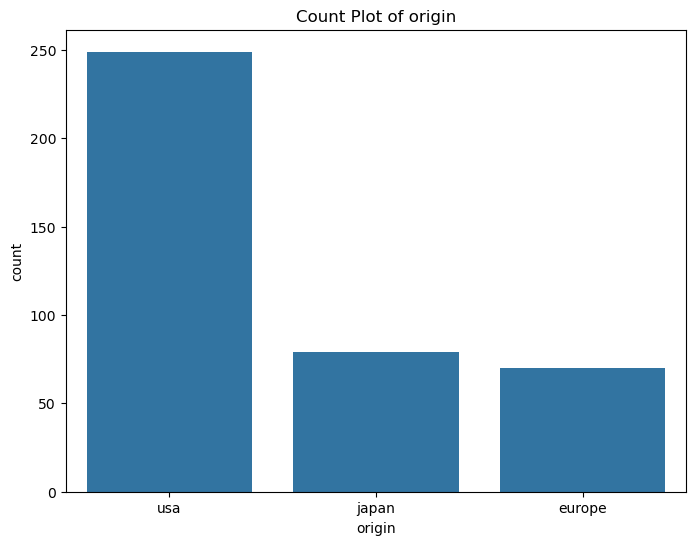

In [16]:
# Bar plot for origin
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=categorical_feature)
plt.title(f'Count Plot of {categorical_feature}')
plt.show()



--- Bivariate Analysis (Feature vs. Target) 


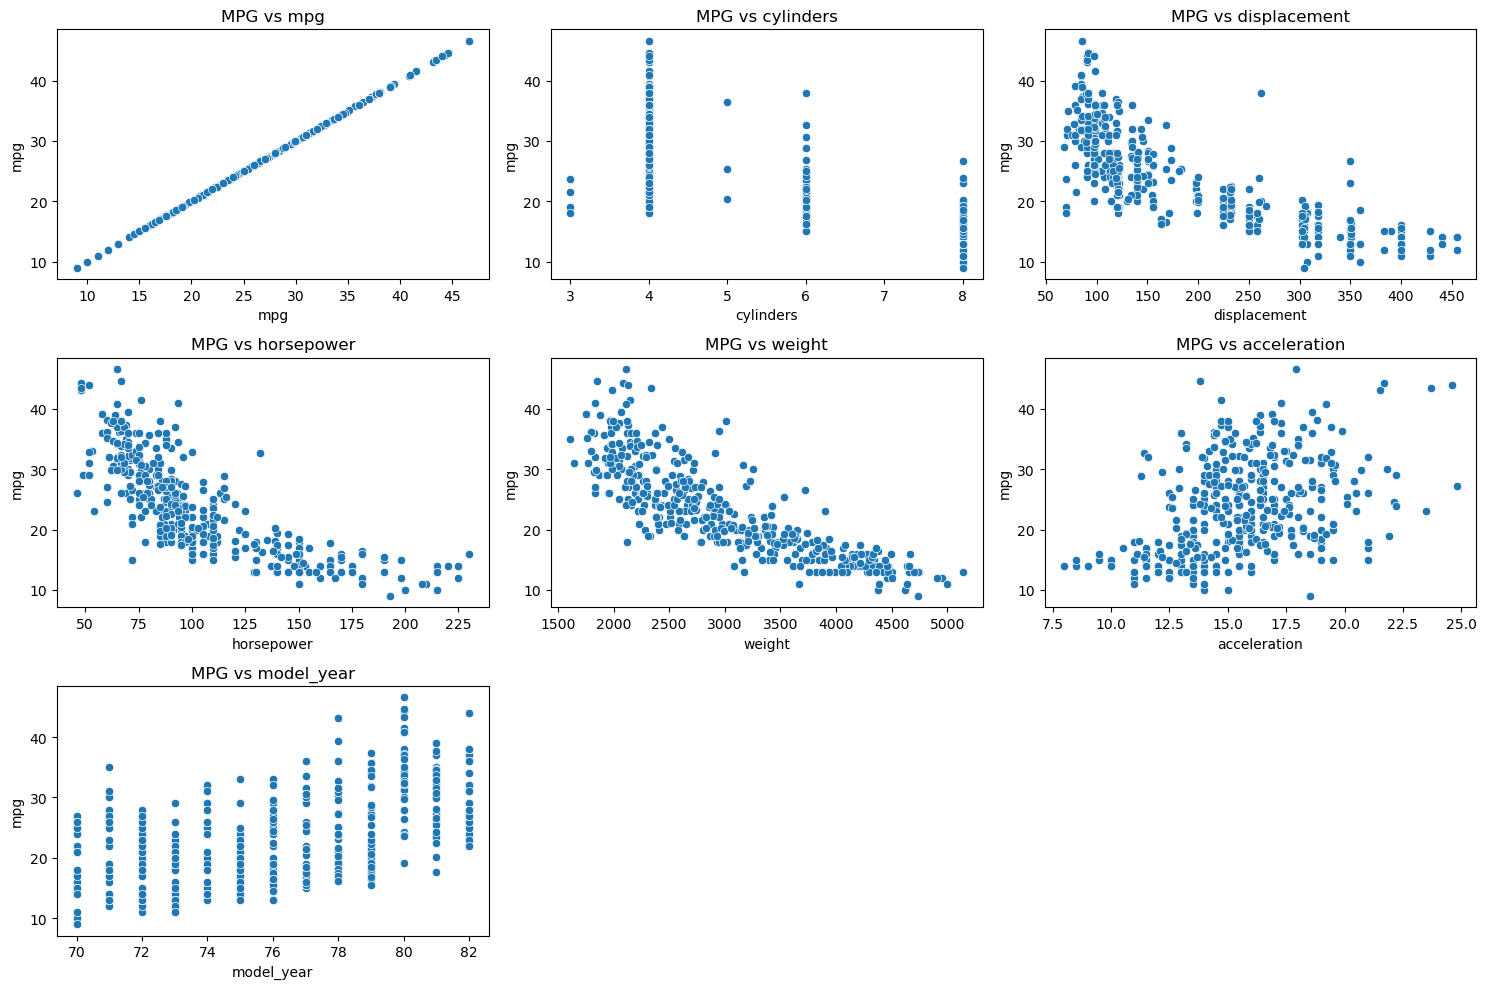

In [33]:
#  Bivariate Analysis (Feature vs. Target) 
print("\n--- Bivariate Analysis (Feature vs. Target) ")
# Scatter plots of numerical features vs. mpg
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(data=df, x=df[feature], y=df['mpg'])
    plt.title(f'MPG vs {feature}')
plt.tight_layout()
plt.show()


--- Correlation Analysis (moved here for logical flow) ---


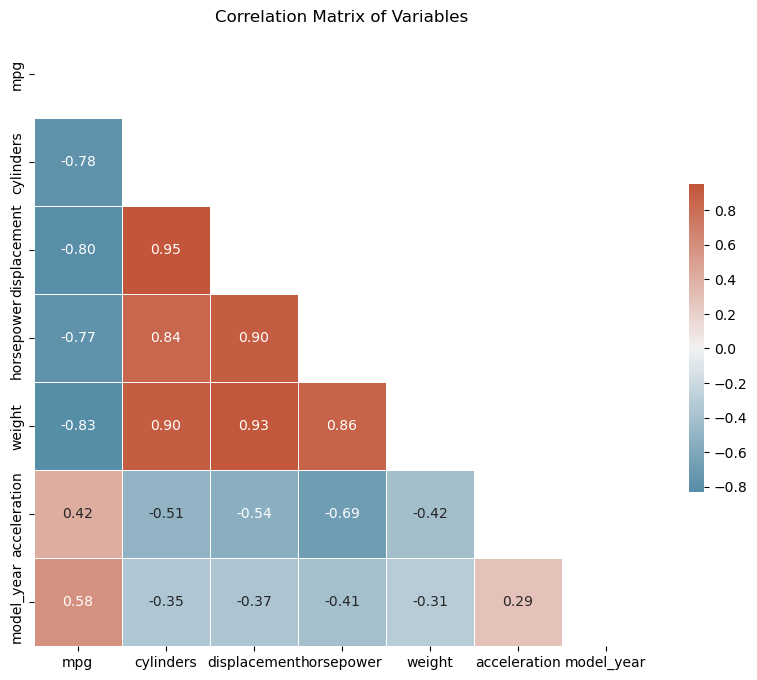

In [19]:
# --- Correlation Analysis (already in Step 6) ---
print("\n--- Correlation Analysis (moved here for logical flow) ---")
corr = df.corr(numeric_only=True) # Explicitly handle numeric columns
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Variables')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'origin' column
df_encoded = pd.get_dummies(df, columns=['origin'])

# Define the predictors and target
X = df_encoded.drop(columns=['name', 'mpg'])
y = df_encoded['mpg']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = model.predict(X_test)

# Compute the mean squared error and R-squared of the prediction
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(8.338657478621636, 0.844909633276208)

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred_rf = rf_model.predict(X_test)

# Compute the mean squared error and R-squared of the prediction
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(4.542255674999999, 0.9155187630388889)

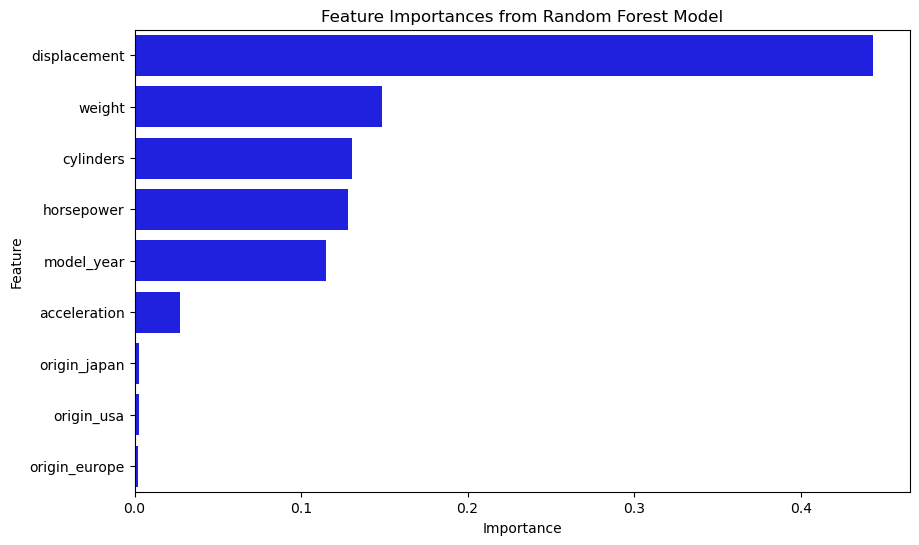

In [29]:
importances = rf_model.feature_importances_

# Create a dataframe for visualization
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the dataframe by importance score
importances_df = importances_df.sort_values('importance', ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances_df, color='b')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the grid search with a Random Forest model
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.845649097799208)

In [32]:
# Initialize and fit the Random Forest model with the best hyperparameters
rf_model_best = RandomForestRegressor(**best_params, random_state=42)
rf_model_best.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred_rf_best = rf_model_best.predict(X_test)

# Compute the mean squared error and R-squared of the prediction
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

mse_rf_best, r2_rf_best


(3.967187462525569, 0.9262144343975592)

In [41]:
# Define the new data instance
new_data = pd.DataFrame({
    'cylinders': [10],
    'displacement': [260],
    'horsepower': [150],
    'weight': [3500],
    'acceleration': [20],
    'model_year': [75],
    'origin_europe': [0],
    'origin_japan': [1],
    'origin_usa': [0]
})

# Use the optimized Random Forest model to predict the mpg for the new data instance
mpg_pred = rf_model_best.predict(new_data)

mpg_pred[0]


15.65639523809524